# FILTER AND ANALYZE THE VARIANTS FROM CH DRIVER GENES


### MAIN STEPS

1. Filter out variants with 2+ ALT, 2 ALT Indels, and AD=0

2. Filter by canonical transcripts (VEP)

3. Extract VEP info and rearrange dataframe

General analysis of the variants obtaines


Analysis implemented in Python script: **filterarrange_chvariants_mafvep.py**



In [1]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import gzip
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# 1. Filter out variants with 2+ ALT, 2 ALT Indels, and AD=0 

In [3]:
# List MAF fiels
maf_files = os.listdir('/workspace/projects/clonalhemato_ukb/ch_variants_50k')
maf_files = [file for file in maf_files if '.maf.vep' in file]

# Set file location 1st MAF
filename = '/workspace/projects/clonalhemato_ukb/ch_variants_50k/' + maf_files[0]

# Transform to pandas dataframe eliminating comment lines
lines = ''.join([line for line in gzip.open(filename, 'rt') if not line.startswith("##")])
maf = pd.read_csv(StringIO(lines), sep= '\t')

maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,X,124061774,.,T,TAAAAAA,0.00,.,CSQ=AAAAAA|inframe_insertion|MODERATE|STAG2|EN...,1,27,0.037037,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,NaN,NaN,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
459,X,124061774,.,T,TTAAAAAA,0.00,.,CSQ=TAAAAAA|frameshift_variant|HIGH|STAG2|ENSG...,0,27,0.000000,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,NaN,NaN,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
460,X,124061774,.,T,TTTAAAAAA,0.00,.,CSQ=TTAAAAAA|stop_gained&frameshift_variant|HI...,1,27,0.037037,0.925926,4,Indel,0/0,"25,0,1,0,1,0",42,NaN,NaN,"0,79,1149,52,1112,1120,59,1113,1110,1122,42,10...","16,9,2,0",BaseQRankSum=1.369;DP=28;ExcessHet=3.0103;MLEA...
461,X,124071128,rs759815507,CT,C,3.39,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...,4,23,0.173913,0.652174,2,Indel,0/1,"15,4,4,0",20,NaN,NaN,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...


In [4]:
# Eliminate variants with >2 ALT
maf = maf[~(maf["ALT_num"] > 2)]
maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,X,124061771,.,C,*,0.00,.,.,2,22,0.090909,0.909091,2,SNV,0/0,"20,0,2,0",23,NaN,NaN,"0,80,1168,23,1062,1062,81,1153,1070,1155","14,6,2,0",BaseQRankSum=0.058;DP=23;ExcessHet=3.0103;MLEA...
455,X,124061773,.,C,A,0.00,.,CSQ=A|missense_variant&splice_region_variant|M...,0,26,0.000000,0.923077,2,SNV,0/0,"24,0,2,0",23,NaN,NaN,"0,79,1149,23,1059,1062,80,1141,1068,1145","16,8,2,0",BaseQRankSum=0.832;DP=27;ExcessHet=3.0103;MLEA...
456,X,124061773,.,C,*,0.00,.,.,2,26,0.076923,0.923077,2,SNV,0/0,"24,0,2,0",23,NaN,NaN,"0,79,1149,23,1059,1062,80,1141,1068,1145","16,8,2,0",BaseQRankSum=0.832;DP=27;ExcessHet=3.0103;MLEA...
461,X,124071128,rs759815507,CT,C,3.39,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...,4,23,0.173913,0.652174,2,Indel,0/1,"15,4,4,0",20,NaN,NaN,"38,0,363,20,261,381,97,362,381,466","13,2,8,0",BaseQRankSum=1.184;DB;DP=32;ExcessHet=3.0103;M...


In [5]:
# Eliminate variants with 2 ALT that are indels
maf = maf[~((maf["ALT_num"] == 2) & (maf["var_type"] == "Indel"))]
maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,X,124061770,.,G,*,0.00,.,.,2,22,0.090909,0.909091,2,SNV,0/0,"20,0,2,0",8,NaN,NaN,"0,65,943,8,837,837,66,928,845,930","15,5,2,0",BaseQRankSum=0.754;DP=23;ExcessHet=3.0103;MLEA...
453,X,124061771,.,C,A,0.00,.,CSQ=A|missense_variant&splice_region_variant|M...,0,22,0.000000,0.909091,2,SNV,0/0,"20,0,2,0",23,NaN,NaN,"0,80,1168,23,1062,1062,81,1153,1070,1155","14,6,2,0",BaseQRankSum=0.058;DP=23;ExcessHet=3.0103;MLEA...
454,X,124061771,.,C,*,0.00,.,.,2,22,0.090909,0.909091,2,SNV,0/0,"20,0,2,0",23,NaN,NaN,"0,80,1168,23,1062,1062,81,1153,1070,1155","14,6,2,0",BaseQRankSum=0.058;DP=23;ExcessHet=3.0103;MLEA...
455,X,124061773,.,C,A,0.00,.,CSQ=A|missense_variant&splice_region_variant|M...,0,26,0.000000,0.923077,2,SNV,0/0,"24,0,2,0",23,NaN,NaN,"0,79,1149,23,1059,1062,80,1141,1068,1145","16,8,2,0",BaseQRankSum=0.832;DP=27;ExcessHet=3.0103;MLEA...


In [6]:
# Eliminate variants with AD ALT = 0
maf = maf[maf["AD_alt"] > 0]
maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,4,105241954,rs2866777,C,*,876.77,.,.,18,19,0.947368,0.000000,2,SNV,1/1,"0,18,1,0",31,NaN,NaN,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
388,4,105241954,rs2866777,C,T,876.77,.,CSQ=T|intron_variant&NMD_transcript_variant|MO...,1,19,0.052632,0.000000,2,SNV,1/1,"0,18,1,0",31,NaN,NaN,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1...."
452,X,124061770,.,G,*,0.00,.,.,2,22,0.090909,0.909091,2,SNV,0/0,"20,0,2,0",8,NaN,NaN,"0,65,943,8,837,837,66,928,845,930","15,5,2,0",BaseQRankSum=0.754;DP=23;ExcessHet=3.0103;MLEA...
454,X,124061771,.,C,*,0.00,.,.,2,22,0.090909,0.909091,2,SNV,0/0,"20,0,2,0",23,NaN,NaN,"0,80,1168,23,1062,1062,81,1153,1070,1155","14,6,2,0",BaseQRankSum=0.058;DP=23;ExcessHet=3.0103;MLEA...


In [7]:
maf["var_type"].value_counts()
print(len(maf))

379


In [8]:
maf['AD_alt'].describe()

count    379.000000
mean      17.841689
std       16.516346
min        1.000000
25%        6.000000
50%       13.000000
75%       24.000000
max       87.000000
Name: AD_alt, dtype: float64

In [8]:
# ### GET NUMBER OF VARIANTS, DP AND VAF
#
# # List MAF fiels
# maf_files = os.listdir('/workspace/projects/clonalhemato_ukb/ch_variants_50k/')
# maf_files = [file for file in maf_files if '.maf.vep' in file]

# nvariants = []
# DPs = []
# VAF_alts = []

# # Loop
# for i in tqdm(maf_files):
#     file = '/workspace/projects/clonalhemato_ukb/ch_variants_50k/' + i
#     lines = ''.join([line for line in gzip.open(file, 'rt') if not line.startswith("##")])
#     maf = pd.read_csv(StringIO(lines), sep= '\t')
    
#     # Eliminate variants with >2 ALT
#     maf = maf[~(maf["ALT_num"] > 2)]
#     # Eliminate variants with 2 ALT that are indels
#     maf = maf[~((maf["ALT_num"] == 2) & (maf["var_type"] == "Indel"))]
#     # Eliminate variants with AD ALT = 0
#     maf = maf[maf["AD_alt"] > 0]
    
#     # Get number of variants
#     nvariants.append(len(maf))
    
#     # Get all DPs
#     DPs.append(maf["DP"].to_list())
    
#     # Get all VAF_alts
#     VAF_alts.append(maf["VAF_alt"].to_list())



In [9]:
#print(nvariants[:100])

In [10]:
# from pandas.core.common import flatten
# print(len(list(flatten(DPs))))

In [11]:
# from pandas.core.common import flatten
# print(len(list(flatten(VAF_alts))))

In [12]:
# Histogram number of variants

# plt.hist(nvariants, 100)
# plt.xlabel('Number of variants')
# plt.show()

In [13]:
# with open('results/number_variants.txt', 'w') as f:
#     for item in nvariants:
#         f.write("%s\n" % item)

In [14]:
### NUMBER OF VARIANTS

# Read data
my_file = open('results/number_variants.txt', 'r')
lines = my_file.read().splitlines()
# Transform to integer
nvariants = [int(item) for item in lines]

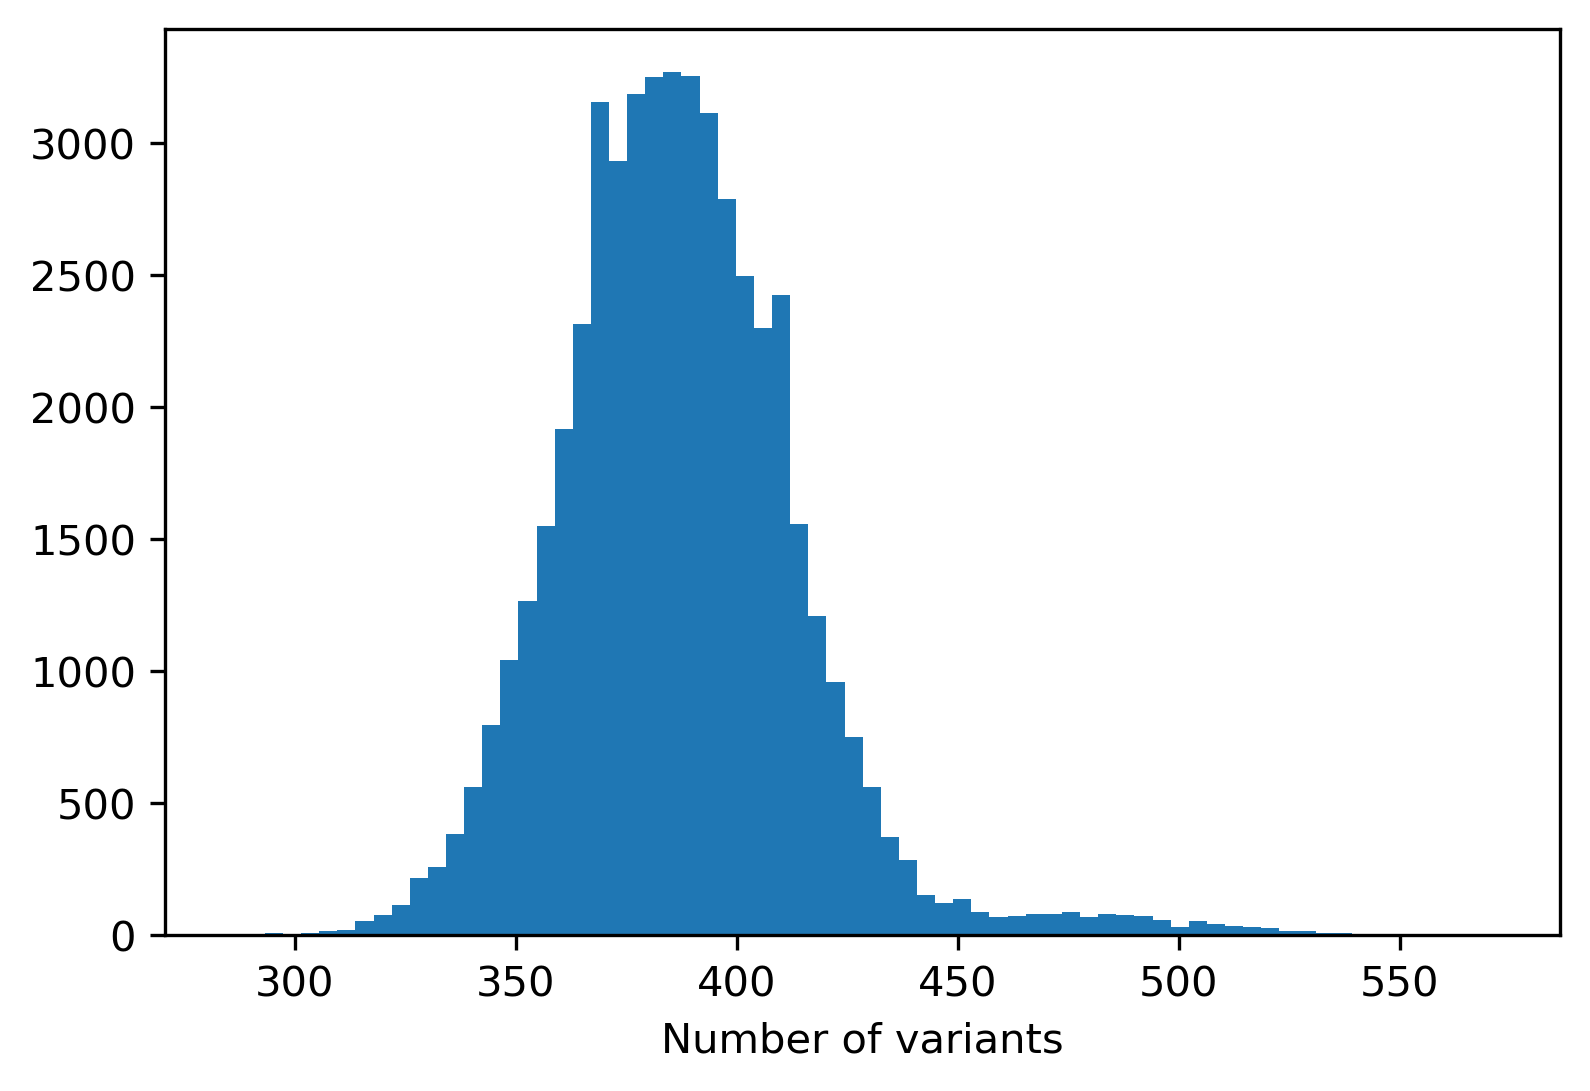

In [15]:
# Histogram number of variants
plt.hist(nvariants, 70)
plt.xlabel('Number of variants')
plt.show()

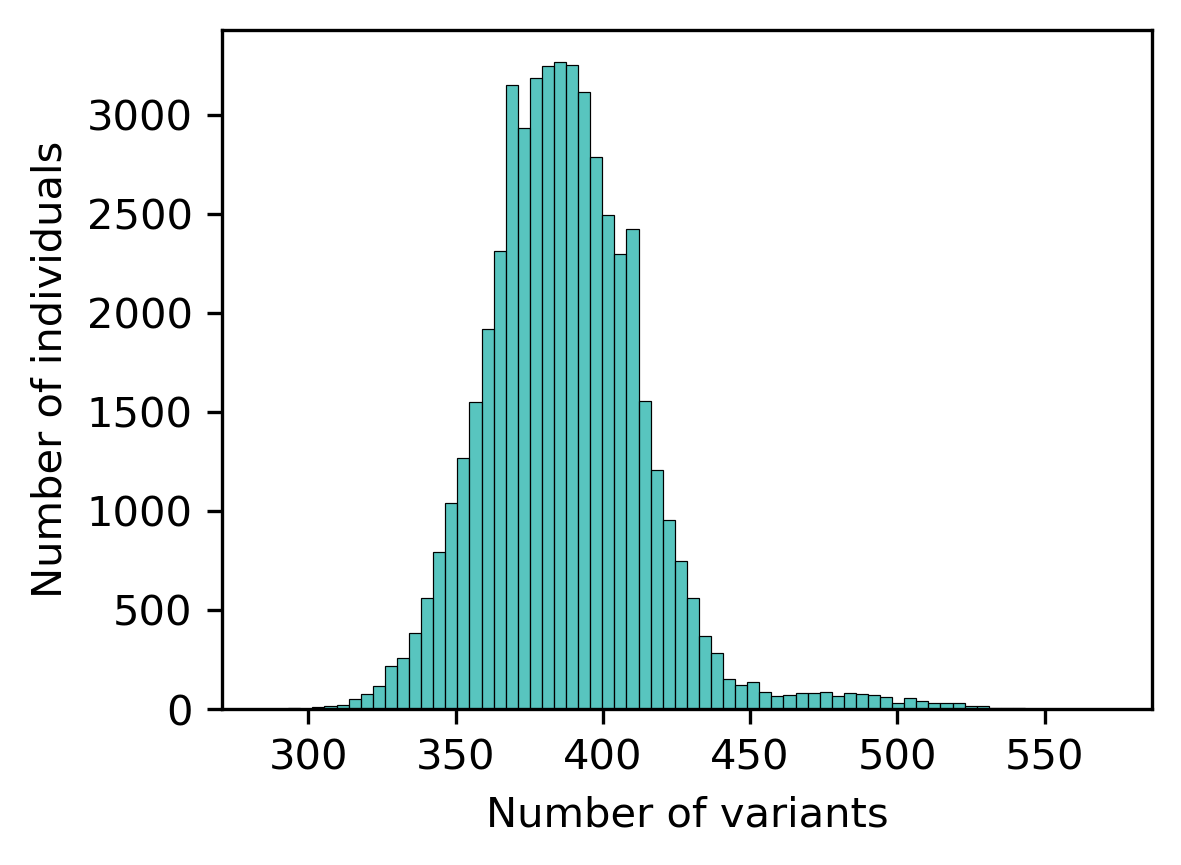

In [62]:
plt.rcParams["figure.figsize"] = (4,3)
graph = sns.histplot(nvariants, bins=70, color="lightseagreen")
graph.set(xlabel="Number of variants", ylabel="Number of individuals")
plt.show()

In [17]:
# Descriptive statistics
nvariants_df = pd.DataFrame(nvariants)
round(nvariants_df.describe(percentiles=[.1,.25, .5, .75,.9]), 1)

,0
count,49989.0
mean,387.3
std,27.8
min,285.0
10%,355.0
25%,370.0
50%,386.0
75%,403.0
90%,419.0
max,572.0


In [18]:
# Histogram DP

# plt.hist(list(flatten(DPs)), 100)
# plt.xlabel('Depth (DP)')
# plt.show()


In [19]:
# depths = list(flatten(DPs))

# with open('results/DPs.txt', 'w') as f:
#     for item in depths:
#         f.write("%s\n" % item)

In [27]:
### DEPTHS (DPs)

# Read data
my_file = open('results/DPs.txt', 'r')
lines = my_file.read().splitlines()
# Transform to integer
depths_DP = [int(item) for item in lines]


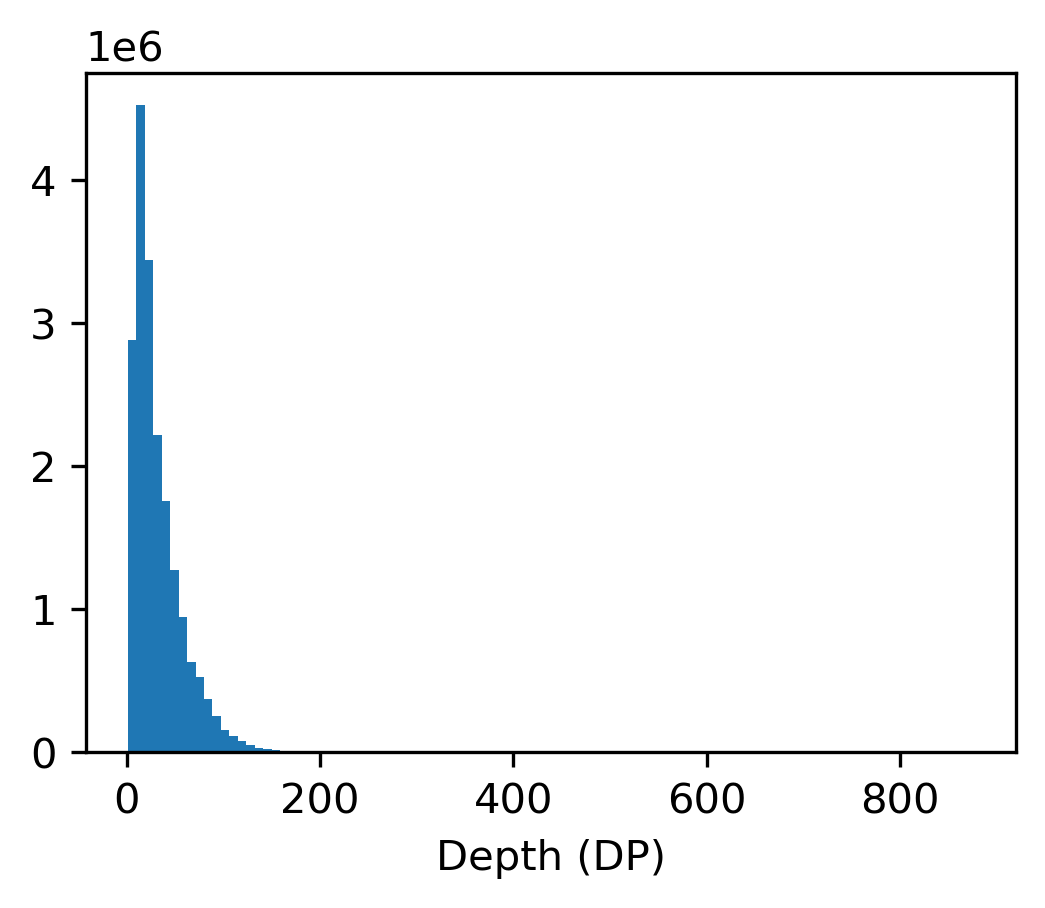

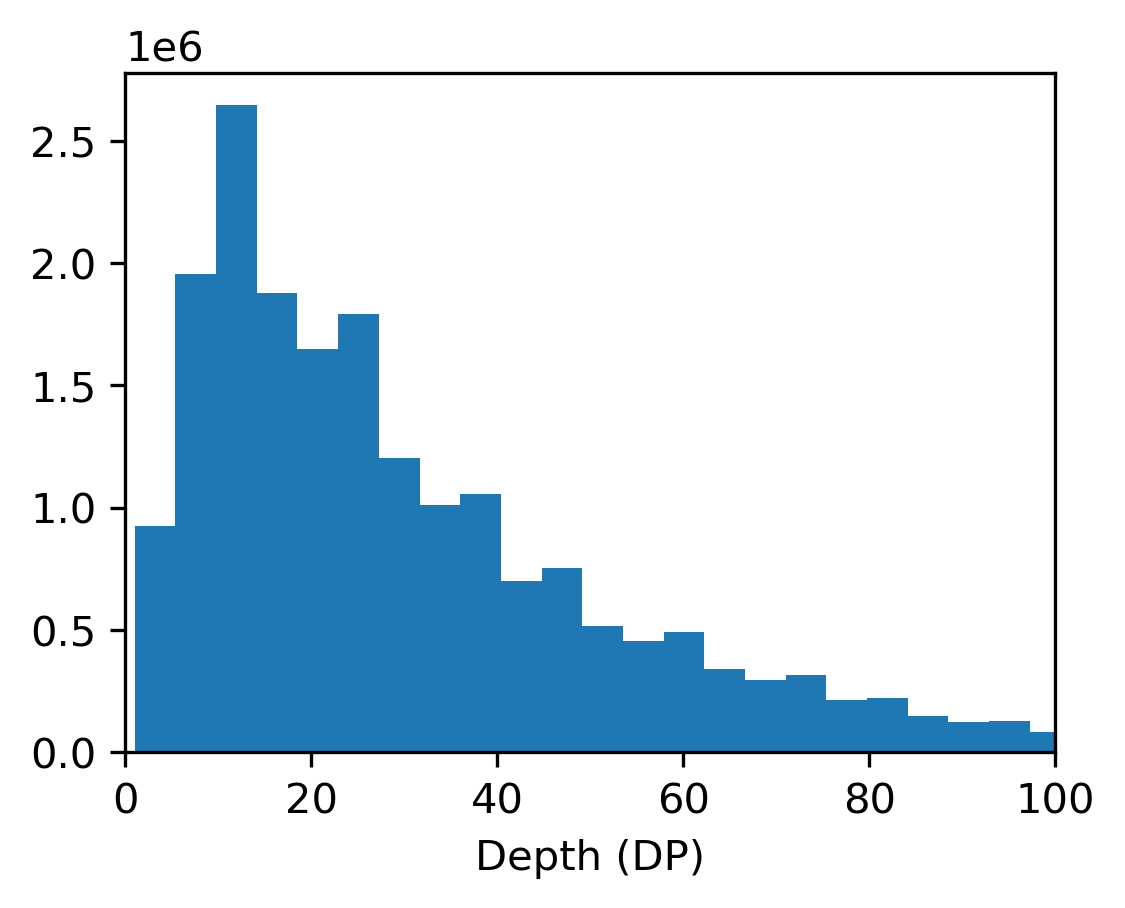

In [21]:
# Histogram depths (DPs)

# Histogram
plt.hist(depths_DP, 100)
plt.xlabel('Depth (DP)')
plt.show()

plt.hist(depths_DP, 200)
plt.xlabel('Depth (DP)')
plt.xlim([0, 100])
plt.show()


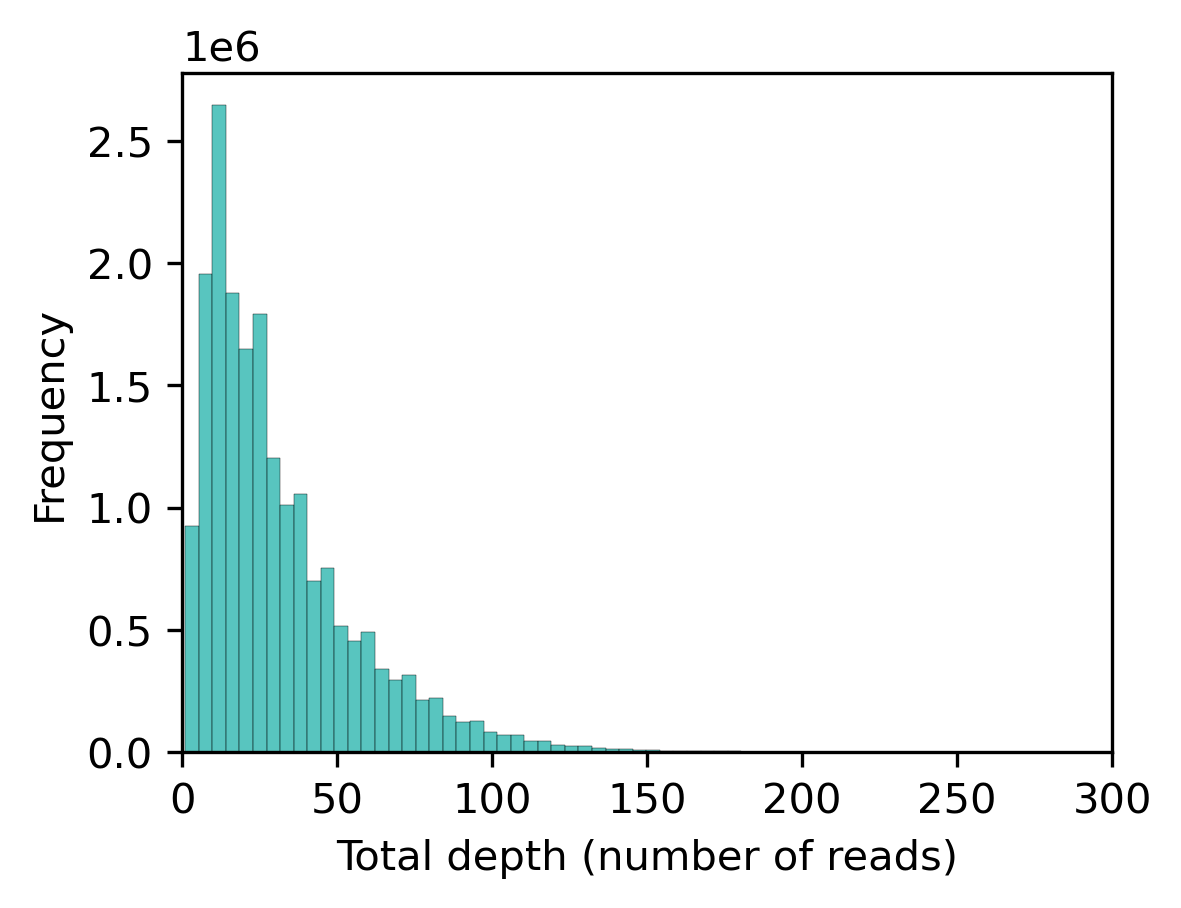

In [22]:
plt.rcParams["figure.figsize"] = (4,3)
graph = sns.histplot(depths_DP, bins=200, color="lightseagreen")
graph.set(xlabel="Total depth (number of reads)", ylabel="Frequency", xlim=[0,300])
plt.show()

In [23]:
pd.DataFrame(sorted(depths_DP))[0].value_counts().head(20)

10    539860
11    538117
12    533841
9     531728
13    523158
8     514150
14    511341
15    495082
7     480948
16    476915
17    459346
18    444806
6     430448
19    429419
20    417730
21    405361
22    394289
23    382591
24    371311
5     359221
Name: 0, dtype: int64

In [65]:
# Descriptive statistics
depths_DP_df = pd.DataFrame(depths_DP)
round(depths_DP_df.describe(percentiles=[.1,.25, .5, .75,.9]), 1)

,0
count,19361635.0
mean,32.3
std,29.4
min,1.0
10%,8.0
25%,13.0
50%,24.0
75%,43.0
90%,67.0
max,876.0


In [25]:
# # Histogram VAF

# plt.hist(list(flatten(VAF_alts)),50)
# plt.xlabel('VAF ALT allels')
# plt.show()


In [26]:
# VAFs = list(flatten(VAF_alts))

# #with open('results/VAFs.txt', 'w') as f:
#     for item in VAFs:
#         f.write("%s\n" % item)

In [27]:
### VARIANT ALLEL FREQUENCY (VAF)

# Read data
my_file = open('results/VAFs.txt', 'r')
lines = my_file.read().splitlines()
# Transform to float
freq_VAFs = [float(item) for item in lines]

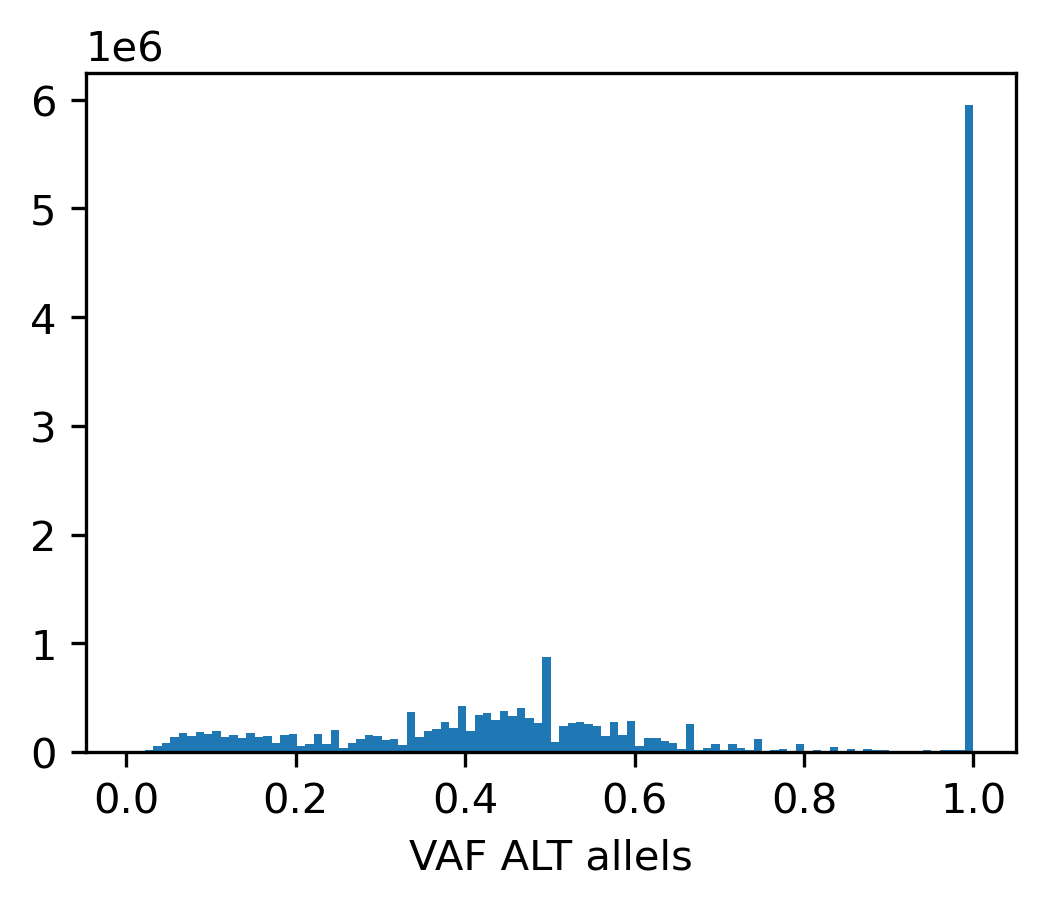

In [28]:
# Histogram VAFs
plt.hist(freq_VAFs, 100)
plt.xlabel('VAF ALT allels')
plt.show()

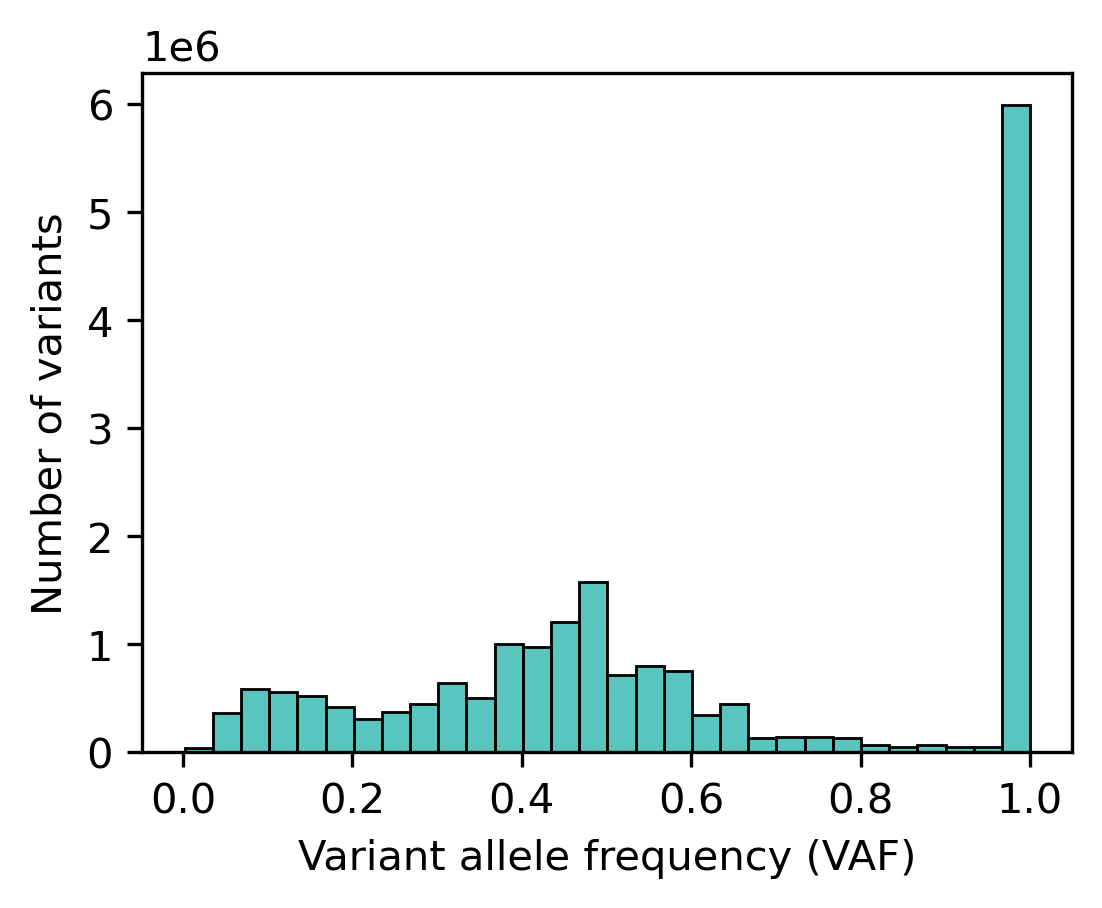

In [29]:
plt.rcParams["figure.figsize"] = (4,3)
graph = sns.histplot(freq_VAFs, bins=30, color="lightseagreen")
graph.set(xlabel="Variant allele frequency (VAF)", ylabel="Number of variants")
plt.show()

In [30]:
# Descriptive statistics
freq_VAFs_df = pd.DataFrame(freq_VAFs)
round(freq_VAFs_df.describe(percentiles=[.05,.1,.15,.2,.25, .5, .75,.9]), 2)

,0
count,19361635.00
mean,0.59
std,0.31
min,0.00
5%,0.10
10%,0.16
15%,0.25
20%,0.32
25%,0.37
50%,0.52


In [83]:
# Homozygous variants
print(round(sum(freq_VAFs_df[0] == 1) / len(freq_VAFs_df[0]), 4))
print(round(sum(freq_VAFs_df[0] > 0.95) / len(freq_VAFs_df[0]), 4))
print(round(sum(freq_VAFs_df[0] > 0.90) / len(freq_VAFs_df[0]), 4))

0.3072
0.3109
0.3145


In [87]:
# Heterozygous variants
print(round((sum(freq_VAFs_df[0] < 0.6) - sum(freq_VAFs_df[0] <= 0.4)) / len(freq_VAFs_df[0]), 4))
print(round((sum(freq_VAFs_df[0] < 0.65) - sum(freq_VAFs_df[0] <= 0.35)) / len(freq_VAFs_df[0]), 4))
print(round((sum(freq_VAFs_df[0] < 0.70) - sum(freq_VAFs_df[0] <= 0.30)) / len(freq_VAFs_df[0]), 4))

0.2992
0.4051
0.4665


In [88]:
print("Total number of variants:")
print(len(freq_VAFs))
print()

print("Number of variants with VAF = 0:")
print(len([i for i in freq_VAFs if i == 0]))
print()

print("Number of variants with VAF < 2%:")
VAF_2 = [i for i in freq_VAFs if i < 0.02]
print(len(VAF_2))
print()

print("Number of variants with VAF < 33%:")
VAF_30 = [i for i in freq_VAFs if i < 0.33]
print(len(VAF_30))
print(round(len(VAF_30) / len(freq_VAFs) *100, 1))
print()


print("Number of variants with VAF < 30%:")
VAF_30 = [i for i in freq_VAFs if i < 0.3]
print(len(VAF_30))
print(round(len(VAF_30) / len(freq_VAFs) *100, 1))
print()

print("Number of variants with VAF < 25%:")
VAF_25 = [i for i in freq_VAFs if i < 0.25]
print(len(VAF_25))
print(round(len(VAF_25) / len(freq_VAFs) *100, 1))
print()

print("Number of variants with VAF < 20%:")
VAF_20 = [i for i in freq_VAFs if i < 0.20]
print(len(VAF_20))
print(round(len(VAF_20) / len(freq_VAFs) *100, 1))
print()


Total number of variants:
19361635

Number of variants with VAF = 0:
0

Number of variants with VAF < 2%:
3465

Number of variants with VAF < 33%:
3903071
20.2

Number of variants with VAF < 30%:
3527077
18.2

Number of variants with VAF < 25%:
2867977
14.8

Number of variants with VAF < 20%:
2342200
12.1



In [9]:
# ### GET NUMBER OF AD

# # List MAF fiels
# maf_files = os.listdir('/workspace/projects/clonalhemato_ukb/ch_variants_50k/')
# maf_files = [file for file in maf_files if '.maf.vep' in file]

# ADs = []

# # Loop
# for i in tqdm(maf_files):
#     file = '/workspace/projects/clonalhemato_ukb/ch_variants_50k/' + i
#     lines = ''.join([line for line in gzip.open(file, 'rt') if not line.startswith("##")])
#     maf = pd.read_csv(StringIO(lines), sep= '\t')
    
#     # Eliminate variants with >2 ALT
#     maf = maf[~(maf["ALT_num"] > 2)]
#     # Eliminate variants with 2 ALT that are indels
#     maf = maf[~((maf["ALT_num"] == 2) & (maf["var_type"] == "Indel"))]
#     # Eliminate variants with AD ALT = 0
#     maf = maf[maf["AD_alt"] > 0]
   
#     # Get all ADs
#     ADs.append(maf["AD_alt"].to_list())

100%|██████████| 49989/49989 [38:01<00:00, 21.91it/s] 


In [34]:
AD_list = [item for sublist in ADs for item in sublist]
with open('results/ADs.txt', 'w') as f:
    for item in AD_list:
        f.write("%s\n" % item)

In [36]:
### ALLELIC DEPTH (ADs)

# Read data
my_file = open('results/ADs.txt', 'r')
lines = my_file.read().splitlines()
# Transform to integer
allelic_AD = [int(item) for item in lines]

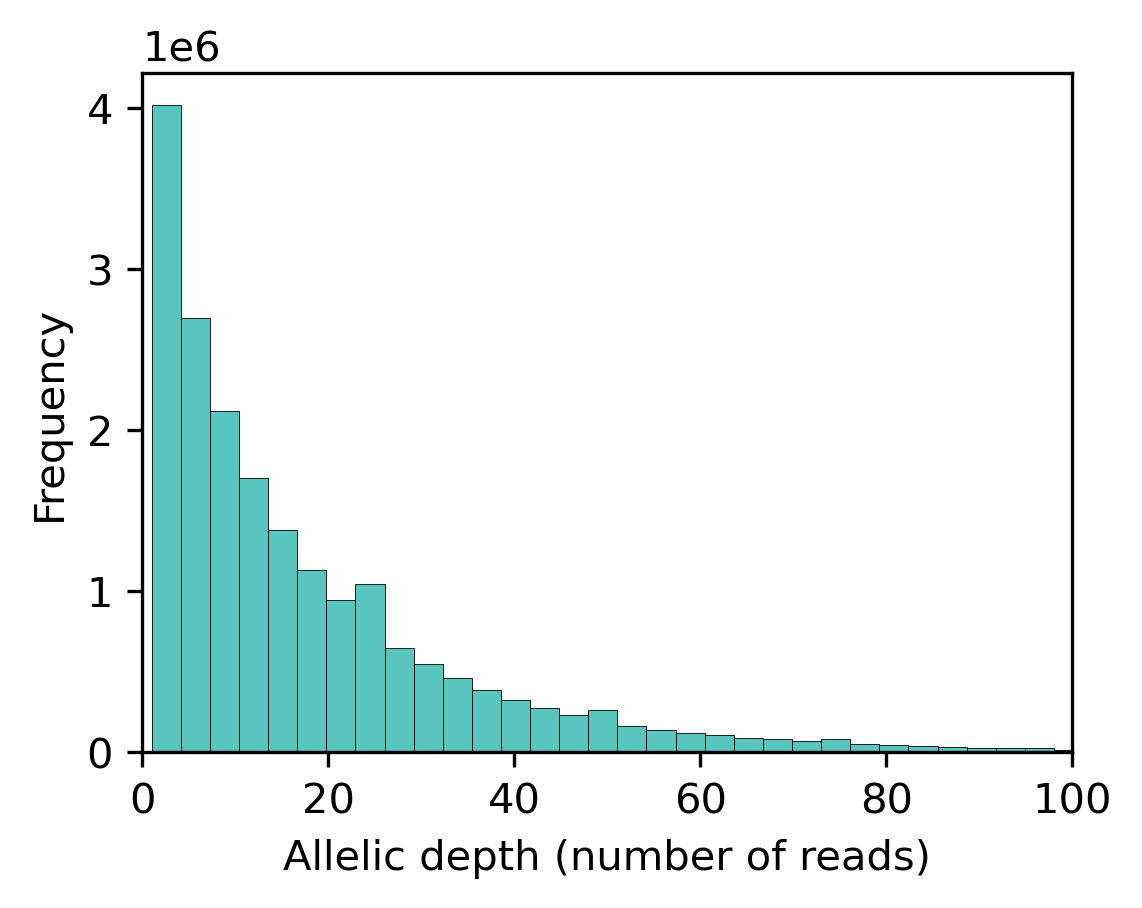

In [43]:
# Histogram allelic depths (ADs)

plt.rcParams["figure.figsize"] = (4,3)
graph = sns.histplot(allelic_AD, bins=100, color="lightseagreen")
graph.set(xlabel="Allelic depth (number of reads)", ylabel="Frequency", xlim=[0,100])
plt.show()

In [ ]:
pd.DataFrame(sorted(allelic_AD))[0].value_counts().head(20)

In [39]:
# Descriptive statistics
allelic_AD_df = pd.DataFrame(allelic_AD)
round(allelic_AD_df.describe(percentiles=[.1,.25, .5, .75,.9]), 1)

,0
count,19361635.0
mean,18.2
std,18.7
min,1.0
10%,3.0
25%,5.0
50%,12.0
75%,24.0
90%,42.0
max,314.0


# 2. Filter by canonical transcripts (VEP)

In [32]:
### Obtain CH canonical transcript codes

# Read file
ch_ctrans_coord = pd.read_csv("/workspace/projects/clonalhemato_ukb/analysis_50k_202103/CH_genes_canonical_transcripts_202103/results/CH_genes_canonical_transcripts_ENST.tsv",
                              sep="\t", header = None)

# Transform to list
ENST = list(ch_ctrans_coord[0])
print(ENST)

['ENST00000502732', 'ENST00000367182', 'ENST00000355710', 'ENST00000224652', 'ENST00000301761', 'ENST00000278616', 'ENST00000264033', 'ENST00000228872', 'ENST00000256078', 'ENST00000334344', 'ENST00000301067', 'ENST00000341259', 'ENST00000635625', 'ENST00000219905', 'ENST00000399231', 'ENST00000330062', 'ENST00000646076', 'ENST00000269305', 'ENST00000358273', 'ENST00000322652', 'ENST00000293328', 'ENST00000264657', 'ENST00000305921', 'ENST00000392485', 'ENST00000389253', 'ENST00000316448', 'ENST00000222329', 'ENST00000391945', 'ENST00000281043', 'ENST00000264709', 'ENST00000258439', 'ENST00000409579', 'ENST00000335508', 'ENST00000415913', 'ENST00000375687', 'ENST00000328111', 'ENST00000371100', 'ENST00000300305', 'ENST00000291552', 'ENST00000646124', 'ENST00000382580', 'ENST00000652095', 'ENST00000287820', 'ENST00000421516', 'ENST00000615603', 'ENST00000336596', 'ENST00000264731', 'ENST00000540549', 'ENST00000257430', 'ENST00000360264', 'ENST00000320356', 'ENST00000262189', 'ENST000003

In [33]:
### Get MAF again and filter

lines = ''.join([line for line in gzip.open(filename, 'rt') if not line.startswith("##")])
maf = pd.read_csv(StringIO(lines), sep= '\t')


### Filter by ALT
# Eliminate variants with >2 ALT
maf = maf[~(maf["ALT_num"] > 2)]
# Eliminate variants with 2 ALT that are indels
maf = maf[~((maf["ALT_num"] == 2) & (maf["var_type"] == "Indel"))]
# Eliminate variants with AD ALT = 0
maf = maf[maf["AD_alt"] > 0]


### Eliminate variants w/o VEP
maf = maf[maf['VEP'] != "."]


### Reset index
maf.reset_index(drop=True, inplace=True)
maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,X,124068468,rs113697794,C,CTATA,76.73,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...,3,7,0.428571,0.571429,1,Indel,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...
371,X,124392181,rs2076165,T,C,426.77,.,CSQ=C|synonymous_variant|LOW|TENM1|ENSG0000000...,15,43,0.348837,0.651163,1,SNV,0/1,"28,15,0",99,NaN,NaN,"455,0,826,539,871,1410","13,15,7,8",BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...
372,X,124406465,rs960869,G,T,650.77,.,CSQ=T|synonymous_variant|LOW|TENM1|ENSG0000000...,26,45,0.577778,0.422222,1,SNV,0/1,"19,26,0",99,NaN,NaN,"679,0,553,736,631,1367","6,13,10,16",BaseQRankSum=-2.037;DB;DP=45;ExcessHet=3.0103;...
373,2,197400449,rs770725816,T,A,308.73,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,16,31,0.516129,0.483871,2,SNV,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...


In [34]:
### Study VEP column MAF (1st variant)

VEP_annotations = maf['VEP'][0].split(',')

for annotation in VEP_annotations:
    print(annotation)

CSQ=A|intron_variant|MODIFIER|GNB1|ENSG00000078369|Transcript|ENST00000378609|protein_coding||6/11||||||||rs77354509||-1||HGNC|HGNC:4396|YES|ENSP00000367872|0.07107|0.01705|0.03817|0.08113|0.0002183|0.1194|0.1043|0.08193|0.01544|||
A|intron_variant|MODIFIER|GNB1|ENSG00000078369|Transcript|ENST00000434686|protein_coding||7/8||||||||rs77354509||-1|cds_end_NF|HGNC|HGNC:4396||ENSP00000392765|0.07107|0.01705|0.03817|0.08113|0.0002183|0.1194|0.1043|0.08193|0.01544|||
A|intron_variant|MODIFIER|GNB1|ENSG00000078369|Transcript|ENST00000437146|protein_coding||5/5||||||||rs77354509||-1|cds_end_NF|HGNC|HGNC:4396||ENSP00000416651|0.07107|0.01705|0.03817|0.08113|0.0002183|0.1194|0.1043|0.08193|0.01544|||
A|intron_variant|MODIFIER|GNB1|ENSG00000078369|Transcript|ENST00000439272|protein_coding||5/7||||||||rs77354509||-1|cds_end_NF|HGNC|HGNC:4396||ENSP00000399741|0.07107|0.01705|0.03817|0.08113|0.0002183|0.1194|0.1043|0.08193|0.01544|||
A|intron_variant&non_coding_transcript_variant|MODIFIER|GNB1|ENSG0

In [35]:
### Extract VEP info from canonical transcript

VEP_annotations = maf['VEP'][0].split(',')

for annotation in VEP_annotations:
    if annotation.split('|')[6] in ENST:
        print(annotation)

CSQ=A|intron_variant|MODIFIER|GNB1|ENSG00000078369|Transcript|ENST00000378609|protein_coding||6/11||||||||rs77354509||-1||HGNC|HGNC:4396|YES|ENSP00000367872|0.07107|0.01705|0.03817|0.08113|0.0002183|0.1194|0.1043|0.08193|0.01544|||


In [36]:
# Get info from canonical transcript in new column

def get_canonical(vep):
    VEP_annotations = vep.split(',')
    #return VEP_annotations
    for annotation in VEP_annotations:
        #print(len(annotation))
        if len(annotation) > 1:
            if annotation.split('|')[6] in ENST:
                return annotation
            #print(annotation.split('|')[6])

    

maf['VEP_cano'] = maf['VEP'].apply(lambda x: get_canonical(x))

#maf_splited["ALT"] = maf_splited["ALT"].apply(lambda x: eliminate_nonref(x))

maf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,X,124068468,rs113697794,C,CTATA,76.73,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...,3,7,0.428571,0.571429,1,Indel,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,TATA|intron_variant|MODIFIER|STAG2|ENSG0000010...
371,X,124392181,rs2076165,T,C,426.77,.,CSQ=C|synonymous_variant|LOW|TENM1|ENSG0000000...,15,43,0.348837,0.651163,1,SNV,0/1,"28,15,0",99,NaN,NaN,"455,0,826,539,871,1410","13,15,7,8",BaseQRankSum=2.186;DB;DP=43;ExcessHet=3.0103;M...,None
372,X,124406465,rs960869,G,T,650.77,.,CSQ=T|synonymous_variant|LOW|TENM1|ENSG0000000...,26,45,0.577778,0.422222,1,SNV,0/1,"19,26,0",99,NaN,NaN,"679,0,553,736,631,1367","6,13,10,16",BaseQRankSum=-2.037;DB;DP=45;ExcessHet=3.0103;...,None
373,2,197400449,rs770725816,T,A,308.73,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,16,31,0.516129,0.483871,2,SNV,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...


In [37]:
# def get_canonical(vep):
#     VEP_annotations = vep.split(',')
#     #return VEP_annotations
#     for annotation in VEP_annotations:
#         #print(len(annotation))
#         try:
#             if annotation.split('|')[6] in ENST:
#                 return annotation
#         except:
#             pass
#             #print(annotation.split('|')[6])
# maf['VEP_cano'] = maf['VEP'].apply(lambda x: get_canonical(x))

# maf

In [38]:
### Eliminate variants w/o canonical transcript

maf = maf.dropna(axis=0, subset=['VEP_cano'])

maf.head(20)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
5,1,179117284,rs779694937,TA,T,0.04,.,CSQ=-|intron_variant|MODIFIER|ABL2|ENSG0000014...,2,13,0.153846,0.846154,1,Indel,0/1,"11,2,0",17,NaN,NaN,"17,0,267,50,273,323","11,0,2,0",BaseQRankSum=-0.619;DB;DP=14;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|ABL2|ENSG00000143322...
6,1,204525308,rs3789051,C,T,880.77,.,CSQ=T|upstream_gene_variant|MODIFIER|MDM4|ENSG...,25,25,1.000000,0.000000,1,SNV,1/1,"0,25,0",75,NaN,NaN,"909,75,0,909,75,909","0,0,22,3","DB;DP=25;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",T|intron_variant|MODIFIER|MDM4|ENSG00000198625...
7,1,204526467,rs200388119,G,GTT,97.75,.,CSQ=TT|intron_variant|MODIFIER|MDM4|ENSG000001...,5,7,0.714286,0.285714,1,Indel,0/1,"2,5,0",23,NaN,NaN,"135,0,23,140,38,179","0,2,0,5",BaseQRankSum=-0.876;DB;DP=15;ExcessHet=3.0103;...,TT|intron_variant|MODIFIER|MDM4|ENSG0000019862...
8,1,204532210,.,A,G,0.00,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,2,17,0.117647,0.882353,1,SNV,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...
9,1,204542972,rs4252717,T,C,327.78,.,CSQ=C|intron_variant|MODIFIER|MDM4|ENSG0000019...,9,9,1.000000,0.000000,1,SNV,1/1,"0,9,0",27,NaN,NaN,"356,27,0,356,27,356","0,0,1,8","DB;DP=9;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,...",C|intron_variant|MODIFIER|MDM4|ENSG00000198625...


# 3. Extract VEP info and rearrange dataframe

In [39]:
maf['VEP_cano'][8].split('|')

['G',
 'missense_variant',
 'MODERATE',
 'MDM4',
 'ENSG00000198625',
 'Transcript',
 'ENST00000367182',
 'protein_coding',
 '5/11',
 '',
 '',
 '',
 '446',
 '307',
 '103',
 'R/G',
 'Aga/Gga',
 '',
 '',
 '1',
 '',
 'HGNC',
 'HGNC:6974',
 'YES',
 'ENSP00000356150',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [40]:
# Consequence
maf['VEP_cano'][8].split('|')[1]

'missense_variant'

In [41]:
# IMPACT
maf['VEP_cano'][8].split('|')[2]

'MODERATE'

In [42]:
# SYMBOL
maf['VEP_cano'][8].split('|')[3]

'MDM4'

In [43]:
# ENST
maf['VEP_cano'][8].split('|')[6]

'ENST00000367182'

In [44]:
# cDNA_pos
maf['VEP_cano'][8].split('|')[12]

'446'

In [45]:
# CDS_pos
maf['VEP_cano'][8].split('|')[13]

'307'

In [46]:
# Prot_pos
maf['VEP_cano'][8].split('|')[14]

'103'

In [47]:
# AA_change
maf['VEP_cano'][8].split('|')[15]

'R/G'

In [48]:
# rs_ID
maf['VEP_cano'][8].split('|')[17]

''

In [49]:
# ENSP
maf['VEP_cano'][8].split('|')[24]

'ENSP00000356150'

In [50]:
# gnomAD_AF
maf['VEP_cano'][8].split('|')[25]

''

In [51]:
### Get VEP info

maf['Consequence'] = maf['VEP_cano'].apply(lambda x: x.split('|')[1])
maf['IMPACT'] = maf['VEP_cano'].apply(lambda x: x.split('|')[2])
maf['SYMBOL'] = maf['VEP_cano'].apply(lambda x: x.split('|')[3])
maf['ENST'] = maf['VEP_cano'].apply(lambda x: x.split('|')[6])
maf['CDS_pos'] = maf['VEP_cano'].apply(lambda x: x.split('|')[13])
maf['Prot_pos'] = maf['VEP_cano'].apply(lambda x: x.split('|')[14])
maf['AA_change'] = maf['VEP_cano'].apply(lambda x: x.split('|')[15])
maf['rs_ID'] = maf['VEP_cano'].apply(lambda x: x.split('|')[17])
maf['ENSP'] = maf['VEP_cano'].apply(lambda x: x.split('|')[24])
maf['gnomAD_AF'] = maf['VEP_cano'].apply(lambda x: x.split('|')[25])
maf['gnomAD_AF_NFE'] = maf['VEP_cano'].apply(lambda x: x.split('|')[31])

#maf['VEP'].apply(lambda x: get_canonical(x))
maf

<ipython-input-51-63bf57c7c253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maf['Consequence'] = maf['VEP_cano'].apply(lambda x: x.split('|')[1])
<ipython-input-51-63bf57c7c253>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maf['IMPACT'] = maf['VEP_cano'].apply(lambda x: x.split('|')[2])
<ipython-input-51-63bf57c7c253>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,VEP,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE
0,1,1806456,rs77354509,G,A,514.77,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,14,27,0.518519,0.481481,1,SNV,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,intron_variant,MODIFIER,GNB1,ENST00000378609,,,,rs77354509,ENSP00000367872,0.07107,0.1043
1,1,1806461,rs17363334,C,T,546.77,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,15,30,0.500000,0.500000,1,SNV,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,intron_variant,MODIFIER,GNB1,ENST00000378609,,,,rs17363334,ENSP00000367872,0.07184,0.1043
2,1,43339569,rs16830693,A,G,881.77,.,CSQ=G|splice_region_variant&synonymous_variant...,27,41,0.658537,0.341463,1,SNV,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...,splice_region_variant&synonymous_variant,LOW,MPL,ENST00000372470,690,230,E,rs16830693,ENSP00000361548,0.03439,0.03036
3,1,43346404,rs1760670,G,A,232.77,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,8,19,0.421053,0.578947,1,SNV,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,intron_variant,MODIFIER,MPL,ENST00000372470,,,,rs1760670,ENSP00000361548,0.3034,0.3792
4,1,43349193,rs839995,T,C,190.77,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,6,17,0.352941,0.647059,1,SNV,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,intron_variant,MODIFIER,MPL,ENST00000372470,,,,rs839995,ENSP00000361548,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,X,124066457,rs760494042,GT,G,358.73,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...,10,18,0.555556,0.444444,1,Indel,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=-0.324;DB;DP=20;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs34494691,ENSP00000360187,0.001552,0.002352
369,X,124066463,rs34397445,AT,A,358.73,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...,10,18,0.555556,0.444444,1,Indel,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs34397445,ENSP00000360187,0.00195,0.002941
370,X,124068468,rs113697794,C,CTATA,76.73,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...,3,7,0.428571,0.571429,1,Indel,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,TATA|intron_variant|MODIFIER|STAG2|ENSG0000010...,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs35736501,ENSP00000360187,,
373,2,197400449,rs770725816,T,A,308.73,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,16,31,0.516129,0.483871,2,SNV,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,intron_variant,MODIFIER,SF3B1,ENST00000335508,,,,rs788017&COSV59207593,ENSP00000335321,0.6538,0.6738


In [52]:
maf.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'VEP', 'AD_alt',
       'DP', 'VAF_alt', 'VAF_ref', 'ALT_num', 'var_type', 'GT', 'AD', 'GQ',
       'PGT', 'PID', 'PL', 'SB', 'INFO', 'VEP_cano', 'Consequence', 'IMPACT',
       'SYMBOL', 'ENST', 'CDS_pos', 'Prot_pos', 'AA_change', 'rs_ID', 'ENSP',
       'gnomAD_AF', 'gnomAD_AF_NFE'],
      dtype='object')

In [53]:
### REARRANGE DATAFRAME

mafvep = maf [['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'AD_alt',
               'DP', 'VAF_alt', 'VAF_ref', 'ALT_num', 'var_type', 'Consequence', 'IMPACT',
               'SYMBOL', 'ENST', 'CDS_pos', 'Prot_pos', 'AA_change', 'rs_ID', 'ENSP', 
               'gnomAD_AF', 'gnomAD_AF_NFE', 'GT', 'AD', 'GQ',
               'PGT', 'PID', 'PL', 'SB', 'INFO', 'VEP_cano', 'FILTER', 'VEP']]


#mafvep = mafvep.rename(columns={"#CHROM" : "CHROM"})
mafvep

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
0,1,1806456,rs77354509,G,A,514.77,14,27,0.518519,0.481481,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,,,,rs77354509,ENSP00000367872,0.07107,0.1043,0/1,"13,14,0",99,0|1,1806456_G_A,"543,0,1150,588,1192,1780","12,1,14,0",BaseQRankSum=-3.829;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=A|intron_variant|MODIFIER|GNB1|ENSG0000007...
1,1,1806461,rs17363334,C,T,546.77,15,30,0.500000,0.500000,1,SNV,intron_variant,MODIFIER,GNB1,ENST00000378609,,,,rs17363334,ENSP00000367872,0.07184,0.1043,0/1,"15,15,0",99,0|1,1806456_G_A,"575,0,1147,620,1192,1812","12,3,14,1",BaseQRankSum=-4.741;DB;DP=31;ExcessHet=3.0103;...,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...,.,CSQ=T|intron_variant|MODIFIER|GNB1|ENSG0000007...
2,1,43339569,rs16830693,A,G,881.77,27,41,0.658537,0.341463,1,SNV,splice_region_variant&synonymous_variant,LOW,MPL,ENST00000372470,690,230,E,rs16830693,ENSP00000361548,0.03439,0.03036,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...,.,CSQ=G|splice_region_variant&synonymous_variant...
3,1,43346404,rs1760670,G,A,232.77,8,19,0.421053,0.578947,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,,,,rs1760670,ENSP00000361548,0.3034,0.3792,0/1,"11,8,0",99,NaN,NaN,"261,0,437,294,461,755","11,0,8,0",BaseQRankSum=-3.638;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,43349193,rs839995,T,C,190.77,6,17,0.352941,0.647059,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,,,,rs839995,ENSP00000361548,,,0/1,"11,6,0",99,NaN,NaN,"219,0,341,252,360,611","9,2,5,1",BaseQRankSum=3.403;DB;DP=17;ExcessHet=3.0103;M...,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,X,124066457,rs760494042,GT,G,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs34494691,ENSP00000360187,0.001552,0.002352,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=-0.324;DB;DP=20;ExcessHet=3.0103;...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
369,X,124066463,rs34397445,AT,A,358.73,10,18,0.555556,0.444444,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs34397445,ENSP00000360187,0.00195,0.002941,0/1,"8,10,0",99,0|1,124066457_GT_G,"396,0,501,420,531,951","2,6,0,10",BaseQRankSum=0.318;DB;DP=18;ExcessHet=3.0103;M...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
370,X,124068468,rs113697794,C,CTATA,76.73,3,7,0.428571,0.571429,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,,,,rs35736501,ENSP00000360187,,,0/1,"4,3,0",99,NaN,NaN,"114,0,237,126,246,372","4,0,3,0",BaseQRankSum=-1.204;DB;DP=7;ExcessHet=3.0103;M...,TATA|intron_variant|MODIFIER|STAG2|ENSG0000010...,.,CSQ=TATA|intron_variant|MODIFIER|STAG2|ENSG000...
373,2,197400449,rs770725816,T,A,308.73,16,31,0.516129,0.483871,2,SNV,intron_variant,MODIFIER,SF3B1,ENST00000335508,,,,rs788017&COSV59207593,ENSP00000335321,0.6538,0.6738,0/1,"15,16,0,0",99,NaN,NaN,"346,0,578,434,448,997,433,554,961,1013","3,12,1,15",BaseQRankSum=-0.262;DB;DP=39;ExcessHet=3.0103;...,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...


In [54]:
mafvep['Consequence'].value_counts()

intron_variant                                     242
synonymous_variant                                  51
3_prime_UTR_variant                                 23
missense_variant                                    20
splice_region_variant&intron_variant                14
upstream_gene_variant                                5
splice_acceptor_variant                              2
downstream_gene_variant                              2
splice_region_variant&synonymous_variant             2
splice_acceptor_variant&coding_sequence_variant      1
missense_variant&splice_region_variant               1
stop_gained&frameshift_variant                       1
Name: Consequence, dtype: int64

In [55]:
mafvep['IMPACT'].value_counts()

MODIFIER    272
LOW          67
MODERATE     21
HIGH          4
Name: IMPACT, dtype: int64

In [56]:
mafvep[mafvep['AD_alt']==1]

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
73,5,112843212,.,C,T,0.00,1,21,0.047619,0.952381,1,SNV,missense_variant,MODERATE,APC,ENST00000257430,7618,2540,P/S,COSV57369214,ENSP00000257430,,,0/0,"20,1,0",38,NaN,NaN,"0,38,786,60,789,811","12,8,0,1",BaseQRankSum=-1.289;DP=21;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|APC|ENSG000001...,.,CSQ=T|missense_variant|MODERATE|APC|ENSG000001...
127,7,152358681,rs529260739,G,GAA,0.00,1,14,0.071429,0.928571,1,Indel,splice_region_variant&intron_variant,LOW,KMT2C,ENST00000262189,,,,rs376309362,ENSP00000262189,0.005897,0.004849,0/0,"13,1,0",7,NaN,NaN,"0,7,367,39,370,402","2,11,0,1",BaseQRankSum=1.009;DB;DP=25;ExcessHet=3.0103;M...,CSQ=AA|splice_region_variant&intron_variant|LO...,.,CSQ=AA|splice_region_variant&intron_variant|LO...
272,17,31320336,.,T,C,0.00,1,24,0.041667,0.958333,1,SNV,intron_variant,MODIFIER,NF1,ENST00000358273,,,,,ENSP00000351015,,,0/0,"23,1,0",30,NaN,NaN,"0,30,1122,72,1125,1167","23,0,1,0",BaseQRankSum=1.780;DP=24;ExcessHet=3.0103;MLEA...,C|intron_variant|MODIFIER|NF1|ENSG00000196712|...,.,CSQ=C|intron_variant|MODIFIER|EVI2A|ENSG000001...
296,19,45355814,rs777356701,CTT,C,0.03,1,6,0.166667,0.833333,1,Indel,intron_variant,MODIFIER,ERCC2,ENST00000391945,,,,rs35665496,ENSP00000375809,,,0/1,"5,1,0",15,NaN,NaN,"15,0,124,30,127,157","0,5,0,1",BaseQRankSum=-0.674;DB;DP=7;ExcessHet=3.0103;M...,-|intron_variant|MODIFIER|ERCC2|ENSG0000010488...,.,CSQ=-|intron_variant|MODIFIER|ERCC2|ENSG000001...
363,X,124051130,.,G,A,0.00,1,24,0.041667,0.958333,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,1027,343,V/I,COSV54371205,ENSP00000360187,,,0/0,"23,1,0",60,NaN,NaN,"0,60,730,67,733,740","15,8,1,0",BaseQRankSum=-1.614;DP=26;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...
374,4,105241954,rs2866777,C,T,876.77,1,19,0.052632,0.000000,2,SNV,intron_variant,MODIFIER,TET2,ENST00000540549,,,,rs2866777&COSV54410734,ENSP00000442788,,,1/1,"0,18,1,0",31,NaN,NaN,"905,68,0,594,31,539,778,67,583,734","0,0,7,12","DB;DP=23;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1....",T|intron_variant|MODIFIER|TET2|ENSG00000168769...,.,CSQ=T|intron_variant&NMD_transcript_variant|MO...


In [57]:
mafvep['SYMBOL'].value_counts()

NOTCH1    32
KMT2C     23
CUX1      18
NF1       18
EPHA3     16
          ..
CDKN1B     1
ABL2       1
RAD21      1
PPARG      1
CALR       1
Name: SYMBOL, Length: 55, dtype: int64

In [58]:
mafvep[mafvep['Consequence'] != 'intron_variant']

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
2,1,43339569,rs16830693,A,G,881.77,27,41,0.658537,0.341463,1,SNV,splice_region_variant&synonymous_variant,LOW,MPL,ENST00000372470,690,230,E,rs16830693,ENSP00000361548,0.03439,0.03036,0/1,"14,27,0",99,NaN,NaN,"910,0,459,952,541,1493","5,9,6,21",BaseQRankSum=1.575;DB;DP=41;ExcessHet=3.0103;M...,CSQ=G|splice_region_variant&synonymous_variant...,.,CSQ=G|splice_region_variant&synonymous_variant...
8,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,,ENSP00000356150,,,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...
12,1,204549714,rs4245739,C,A,421.77,11,11,1.000000,0.000000,1,SNV,3_prime_UTR_variant,MODIFIER,MDM4,ENST00000367182,,,,rs4245739&CR108921,ENSP00000356150,0.7719,0.7329,1/1,"0,11,0",33,NaN,NaN,"450,33,0,450,33,450","0,0,0,11","DB;DP=11;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",A|3_prime_UTR_variant|MODIFIER|MDM4|ENSG000001...,.,CSQ=A|downstream_gene_variant|MODIFIER|MDM4|EN...
15,2,25247044,rs2276599,C,T,1320.77,35,35,1.000000,0.000000,1,SNV,splice_region_variant&intron_variant,LOW,DNMT3A,ENST00000264709,,,,rs2276599,ENSP00000264709,0.7125,0.7546,1/1,"0,35,0",99,NaN,NaN,"1349,105,0,1349,105,1349","0,0,28,7","DB;DP=35;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",CSQ=T|splice_region_variant&intron_variant|LOW...,.,CSQ=T|splice_region_variant&intron_variant|LOW...
16,2,99601618,rs4851214,G,A,1364.77,49,103,0.475728,0.524272,1,SNV,synonymous_variant,LOW,AFF3,ENST00000409579,1263,421,A,rs4851214,ENSP00000386834,0.2715,0.2769,0/1,"54,49,0",99,NaN,NaN,"1393,0,1619,1555,1766,3321","14,40,12,37",BaseQRankSum=-2.103;DB;DP=103;ExcessHet=3.0103...,A|synonymous_variant|LOW|AFF3|ENSG00000144218|...,.,CSQ=A|synonymous_variant|LOW|AFF3|ENSG00000144...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,X,45079318,rs20539,G,A,227.77,10,19,0.526316,0.473684,1,SNV,synonymous_variant,LOW,KDM6A,ENST00000377967,3111,1037,Q,rs20539&COSV65037388,ENSP00000367203,0.2518,0.1856,0/1,"9,10,0",99,NaN,NaN,"256,0,271,283,301,584","2,7,5,5",BaseQRankSum=-1.463;DB;DP=19;ExcessHet=3.0103;...,CSQ=A|synonymous_variant|LOW|KDM6A|ENSG0000014...,.,CSQ=A|synonymous_variant|LOW|KDM6A|ENSG0000014...
354,X,53192861,rs146836963,A,AC,74.90,4,4,1.000000,0.000000,1,Indel,3_prime_UTR_variant,MODIFIER,KDM5C,ENST00000375401,,,,rs146836963,ENSP00000364550,0.8853,0.9447,1/1,"0,4,0",14,NaN,NaN,"112,14,0,112,14,112","0,0,1,3","DB;DP=4;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00,...",C|3_prime_UTR_variant|MODIFIER|KDM5C|ENSG00000...,.,CSQ=C|downstream_gene_variant|MODIFIER|KDM5C|E...
362,X,124051119,.,A,G,0.10,2,15,0.133333,0.866667,1,SNV,splice_acceptor_variant,HIGH,STAG2,ENST00000371145,,,,COSV54370330&COSV54371550,ENSP00000360187,,,0/1,"13,2,0",12,NaN,NaN,"12,0,481,51,488,539","11,2,1,1",BaseQRankSum=-1.831;DP=16;ExcessHet=3.0103;MLE...,G|splice_acceptor_variant|HIGH|STAG2|ENSG00000...,.,CSQ=G|splice_acceptor_variant|HIGH|STAG2|ENSG0...
363,X,124051130,.,G,A,0.00,1,24,0.041667,0.958333,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,1027,343,V/I,COSV54371205,ENSP00000360187,,,0/0,"23,1,0",60,NaN,NaN,"0,60,730,67,733,740","15,8,1,0",BaseQRankSum=-1.614;DP=26;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...


In [59]:
mafvep[mafvep['Consequence'] != 'intron_variant']['SYMBOL'].value_counts()

KMT2C     16
CUX1      13
APC        9
NOTCH1     8
ATE1       6
          ..
TET2       1
NF1        1
KDM5C      1
ERCC2      1
TP53       1
Name: SYMBOL, Length: 41, dtype: int64

# Check output

In [2]:
output = pd.read_csv('/workspace/projects/clonalhemato_ukb/ch_variants_50k_mafvep/4039659_23161_0_0_ch.maf.vep2.gz',
                    sep='\t')
output

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP
0,1,43346404,rs1760670,G,A,850.77,22,22,1.000000,0.000000,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs1760670,ENSP00000361548,0.303400,0.379200,1/1,"0,22,0",66,NaN,NaN,"879,66,0,879,66,879","0,0,22,0","DB;DP=22;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
1,1,43349193,rs839995,T,C,1339.77,32,32,1.000000,0.000000,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,rs839995,ENSP00000361548,NaN,NaN,1/1,"0,32,0",96,NaN,NaN,"1368,96,0,1368,96,1368","0,0,27,5","DB;DP=32;ExcessHet=3.0103;MLEAC=2,0;MLEAF=1.00...",CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=C|intron_variant|MODIFIER|MPL|ENSG00000117...
2,1,43349364,rs41269541,C,T,443.77,18,37,0.486486,0.513514,1,SNV,splice_region_variant&intron_variant,LOW,MPL,ENST00000372470,NaN,NaN,NaN,rs41269541&COSV65245731,ENSP00000361548,0.004510,0.007247,0/1,"19,18,0",99,0|1,43349364_C_T,"472,0,539,529,592,1121","6,13,3,15",BaseQRankSum=0.562;DB;DP=37;ExcessHet=3.0103;M...,CSQ=T|splice_region_variant&intron_variant|LOW...,.,CSQ=T|splice_region_variant&intron_variant|LOW...
3,1,43349373,.,C,A,0.00,2,30,0.066667,0.933333,1,SNV,intron_variant,MODIFIER,MPL,ENST00000372470,NaN,NaN,NaN,NaN,ENSP00000361548,NaN,NaN,0/0,"28,2,0",44,1|0,43349364_C_T,"0,44,1163,87,1169,1213","4,24,1,1",BaseQRankSum=-1.953;DP=30;ExcessHet=3.0103;MLE...,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...,.,CSQ=A|intron_variant|MODIFIER|MPL|ENSG00000117...
4,1,114714048,rs969273,G,A,27.77,2,6,0.333333,0.666667,1,SNV,intron_variant,MODIFIER,NRAS,ENST00000369535,NaN,NaN,NaN,rs969273,ENSP00000358548,NaN,NaN,0/1,"4,2,0",56,NaN,NaN,"56,0,153,69,159,228","0,4,0,2",BaseQRankSum=-1.834;DB;DP=6;ExcessHet=3.0103;M...,A|intron_variant|MODIFIER|NRAS|ENSG00000213281...,.,CSQ=A|downstream_gene_variant|MODIFIER|CSDE1|E...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,X,124061743,.,CTT,C,0.01,1,6,0.166667,0.833333,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs36097834,ENSP00000360187,0.012230,0.007906,0/1,"5,1,0",12,NaN,NaN,"12,0,119,27,122,149","5,0,1,0",BaseQRankSum=0.674;DP=8;ExcessHet=3.0103;MLEAC...,-|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=-|intron_variant|MODIFIER|STAG2|ENSG000001...
391,X,124061778,.,A,T,0.00,2,21,0.095238,0.904762,1,SNV,synonymous_variant,LOW,STAG2,ENST00000371145,1542,514.0,T,NaN,ENSP00000360187,NaN,NaN,0/0,"19,2,0",13,NaN,NaN,"0,13,642,57,648,691","15,4,1,1",BaseQRankSum=-1.794;DP=21;ExcessHet=3.0103;MLE...,T|synonymous_variant|LOW|STAG2|ENSG00000101972...,.,CSQ=T|synonymous_variant|LOW|STAG2|ENSG0000010...
392,X,124071128,.,C,CT,24.75,5,16,0.312500,0.687500,1,Indel,intron_variant,MODIFIER,STAG2,ENST00000371145,NaN,NaN,NaN,rs77366098,ENSP00000360187,0.051930,0.042910,0/1,"11,5,0",62,NaN,NaN,"62,0,206,94,221,315","11,0,5,0",BaseQRankSum=-0.407;DP=19;ExcessHet=3.0103;MLE...,T|intron_variant|MODIFIER|STAG2|ENSG0000010197...,.,CSQ=T|intron_variant|MODIFIER|STAG2|ENSG000001...
393,2,197400449,rs770725816,T,A,575.73,23,23,1.000000,0.000000,2,SNV,intron_variant,MODIFIER,SF3B1,ENST00000335508,NaN,NaN,NaN,rs788017&COSV59207593,ENSP00000335321,0.653800,0.673800,1/1,"0,23,0,0",68,NaN,NaN,"613,68,0,675,84,916,657,83,809,764","0,0,3,20","DB;DP=28;ExcessHet=3.0103;MLEAC=2,0,0;MLEAF=1....",CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...,.,CSQ=A|intron_variant|MODIFIER|SF3B1|ENSG000001...
